# Sales Analysis

### Importing libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# folder_path on my pc
folder_path = 'C:/Users/Christian/Desktop/Sales-Analysis/Data'

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Leer y concatenar los archivos CSV en un DataFrame
dfs = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)
    
all_data_df = pd.concat(dfs, ignore_index=True)

In [3]:
df_shape = all_data_df.shape

print("Shape of DataFramae: " + str(df_shape))

missing_rows = all_data_df['Order ID'].isna().sum()
print("Rows are completed NaN value: " + str(missing_rows))
all_data_df.head()

Shape of DataFramae: (186850, 6)
Rows are completed NaN value: 545


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Preparation

In [4]:
# Drop all NaN values if all values are missing in a row
all_data_df = all_data_df.dropna(how='all')


# Adding new column ('Month') extracting month of dater order and year
all_data_df['Month'] = all_data_df['Order Date'].str[:2]
all_data_df['Year'] = str(20) + all_data_df['Order Date'].str[6:8]

all_data_df = all_data_df.dropna(how='all')
all_data_df = all_data_df.loc[all_data_df['Month'] != 'Or']

try:
    all_data_df['Month'] = all_data_df['Month'].astype('int64')
    all_data_df['Year'] = all_data_df['Year'].astype('int64')
except:
    print("Error: Data type is wrong")
    
# Converting data type of quantity order and each product & 
try:
    all_data_df['Quantity Ordered'] = all_data_df['Quantity Ordered'].astype(float)
    all_data_df['Price Each'] = all_data_df['Price Each'].astype(float)
except:
    print("Error: Data type is wrong")

# Get cities based on purchase address
all_data_df[['Detail_address', 'City_address','Cod_address']] = all_data_df['Purchase Address'].str.split(",", expand = True)

# Metrics and Calcultation

In [5]:
# Calculating sales for each row
all_data_df['Sales'] = all_data_df['Quantity Ordered'] * all_data_df['Price Each']
all_data_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Detail_address,City_address,Cod_address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,917 1st St,Dallas,TX 75001,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,682 Chestnut St,Boston,MA 02215,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,669 Spruce St,Los Angeles,CA 90001,600.00


<function matplotlib.pyplot.show(close=None, block=None)>

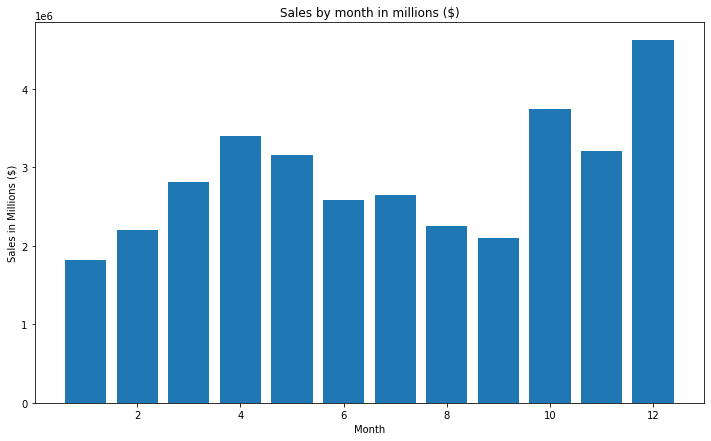

In [6]:
# Calculate sales by month
sales_by_month = all_data_df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 7))
plt.bar(sales_by_month.index, sales_by_month.values)

# Set labels
plt.title('Sales by month in millions ($)')
plt.xlabel('Month')
plt.ylabel('Sales in Millions ($)')
plt.show

In [7]:
# Calculate sales by month
sales_by_cities = all_data_df.groupby('City_address')['Sales'].sum()
display(sales_by_cities)

City_address
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

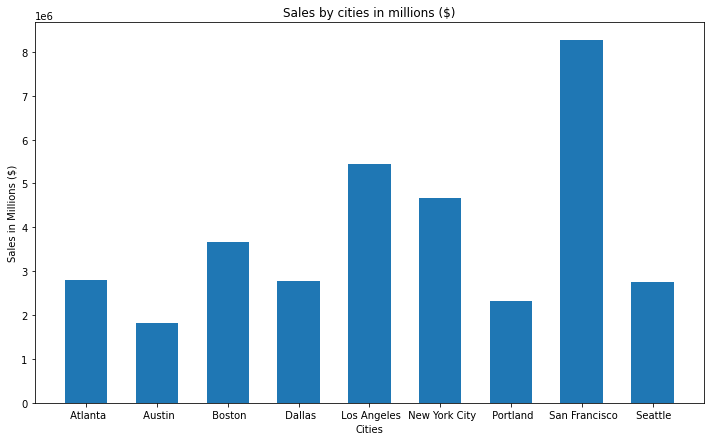

In [8]:
sales_by_cities = all_data_df.groupby('City_address')['Sales'].sum()


plt.figure(figsize=(12, 7))
plt.bar(sales_by_cities.index, sales_by_cities.values, width=0.6)
# Set labels
plt.title('Sales by cities in millions ($)')
plt.xlabel('Cities')
plt.ylabel('Sales in Millions ($)')

plt.show

In [28]:
all_data_df['Hours'] = pd.to_datetime(all_data_df['Order Date']).dt.hour
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Detail_address,City_address,Cod_address,Sales,Hours
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,917 1st St,Dallas,TX 75001,23.90,8
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,682 Chestnut St,Boston,MA 02215,99.99,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,669 Spruce St,Los Angeles,CA 90001,600.00,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,669 Spruce St,Los Angeles,CA 90001,11.99,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019,333 8th St,Los Angeles,CA 90001,11.99,9


<function matplotlib.pyplot.show(close=None, block=None)>

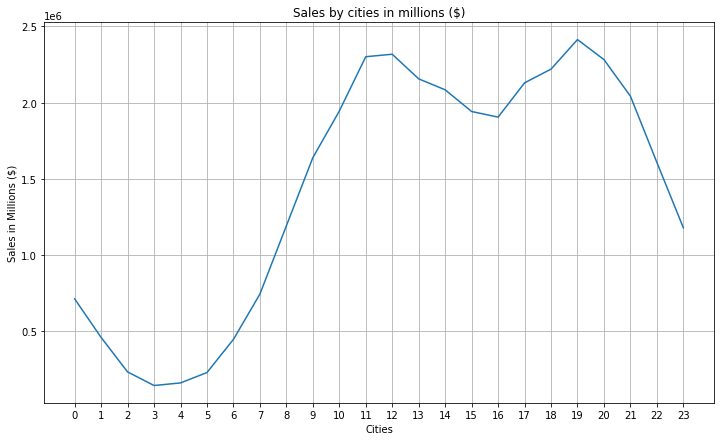

In [38]:
hours = [hour for hour, df in all_data_df.groupby('Hours')]

sales_by_hours = all_data_df.groupby('Hours')['Sales'].sum()


plt.figure(figsize=(12, 7))
plt.grid()
plt.xticks(hours)
plt.plot(hours, sales_by_hours.values)
# Set labels
plt.title('Sales by cities in millions ($)')
plt.xlabel('Cities')
plt.ylabel('Sales in Millions ($)')

plt.show